# Movie Genre Guesser

## Setup

### Imports and Read in Data

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df_ratings = pd.read_csv('data/IMDb ratings.csv', low_memory=False)
df_movies = pd.read_csv('data/IMDb movies.csv', low_memory=False)

In [29]:
df_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [30]:
df_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


### Removes Unnecessary Columns

In [31]:
df_ratings.drop(df_ratings.columns[5:], axis='columns', inplace=True)
df_ratings.drop(labels= ['weighted_average_vote', 'total_votes'],axis='columns', inplace=True)

In [32]:
df_ratings.head()

,imdb_title_id,mean_vote,median_vote
0,tt0000009,5.9,6.0
1,tt0000574,6.3,6.0
2,tt0001892,6.0,6.0
3,tt0002101,5.3,5.0
4,tt0002130,6.9,7.0


In [33]:
df_movies.drop(df_movies.columns[16:], axis='columns', inplace=True)
df_movies.drop(['original_title'], axis='columns', inplace=True)

In [34]:
df_movies.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237


### Combines DataFrames

In [35]:
df_combined = pd.merge(df_movies, df_ratings, on="imdb_title_id").dropna()

## Exploratory Data Analysis (EDA)

In [36]:
import re
import seaborn as sea

In [37]:
df_combined['genre'] = df_combined['genre'].apply(lambda x : x.split(',')[0])
df_combined['country'] = df_combined['country'].apply(lambda x : x.split(',')[0])
df_combined['director'] = df_combined['director'].apply(lambda x : x.split(',')[0])
df_combined['writer'] = df_combined['writer'].apply(lambda x : x.split(',')[0])
df_combined['year'] = df_combined['year'].apply(lambda x : re.findall(r'(\d{4})', x)[0])

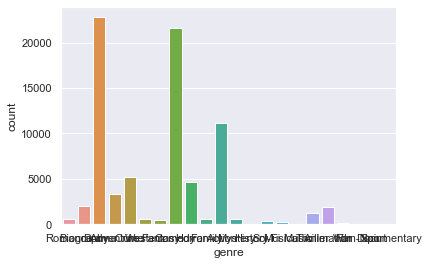

In [38]:
sea.set_theme()
genre_count_plot = sea.countplot(x='genre', data=df_combined)
plt.savefig('images/genre_count.png')

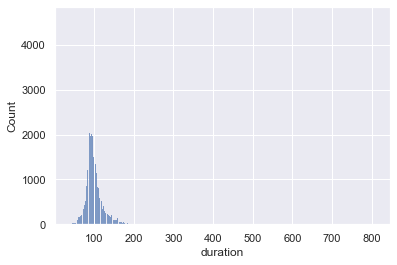

In [39]:
sea.histplot(x='duration', data=df_combined, stat='count')
plt.savefig('images/duration_count.png')

In the above chart you can notice that most movies have a duration of under 250. To clean up and normalize
the data I have decided to drop all the rows were the duration is created than 250.

In [40]:
to_drop = df_combined[~(df_combined['duration'] < 250)].index
df_combined.drop(to_drop, inplace=True)

### Charts of Data Analysis

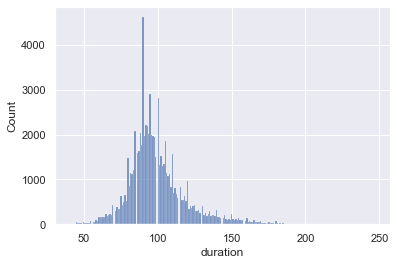

In [41]:
sea.histplot(x='duration', data=df_combined, stat='count')
plt.savefig('images/count_v_duration.png')

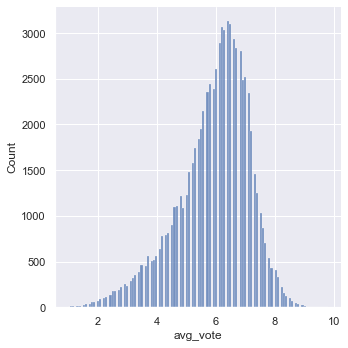

In [42]:
sea.displot(x='avg_vote', data=df_combined)
plt.savefig('images/count_v_avg_vote.png')

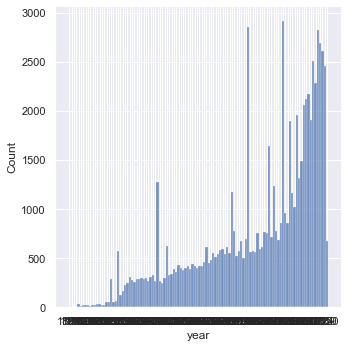

In [43]:
sea.displot(x='year', data=df_combined)
plt.savefig('images/count_year.png')

## The Four Classification Algorithms

In [44]:
from sklearn.model_selection import train_test_split

### Mappings and Train/Test Split

In [45]:
genres = list(df_combined['genre'].unique())
genre_mapping = {}
for x in range(len(genres)):
    genre_mapping[genres[x]] = x
df_combined['genre'] = df_combined['genre'].map(genre_mapping)

In [46]:
companies = list(df_combined['production_company'].unique())
production_company_mapping = {}
for x in range(len(companies)):
    production_company_mapping[companies[x]] = x
df_combined['production_company'] = df_combined['production_company'].map(production_company_mapping)

In [47]:
countries = list(df_combined['country'].unique())
country_mapping = {}
for x in range(len(countries)):
    country_mapping[countries[x]] = x
df_combined['country'] = df_combined['country'].map(country_mapping)

In [48]:
directors = list(df_combined['director'].unique())
director_mapping = {}
for x in range(len(directors)):
    director_mapping[directors[x]] = x
df_combined['director'] = df_combined['director'].map(director_mapping)

In [49]:
writers = list(df_combined['writer'].unique())
writer_mapping = {}
for x in range(len(writers)):
    writer_mapping[writers[x]] = x
df_combined['writer'] = df_combined['writer'].map(writer_mapping)

In [50]:
df_combined.drop(columns=['imdb_title_id', 'date_published', 'title', 'language', 'actors', 'description'], inplace=True)
x_train, x_test= train_test_split(df_combined)

In [51]:
train_genres = x_train['genre']
del x_train['genre']

In [52]:
test_genres = x_test['genre']
del x_test['genre']
x_test.head()

,year,duration,country,director,writer,production_company,avg_vote,votes,mean_vote,median_vote
946,1930,79,0,80,179,96,6.0,138,6.0,6.0
84850,2019,127,19,28853,14137,30495,8.5,430,8.1,10.0
34241,1999,95,0,4667,15020,10241,4.1,682,4.1,3.0
28274,1994,106,4,2207,12084,7089,6.6,196,6.4,7.0
23254,1987,113,11,2031,6346,181,7.3,12196,7.4,8.0


### Categorical Naive Bayes

In [53]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(x_train, train_genres.array)

CategoricalNB()

In [54]:
cat_nb_test = x_test
cat_nb_score = clf.score(cat_nb_test, test_genres)
print(f'Score: {cat_nb_score}')

Score: 0.46299066384690774


Using Categorical Naive Bayes was able to get 46% accuracy. Let's try some other algorithms to see if I can get better results.

### Linear Support Vector Classification

In [55]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [56]:
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0))
clf.fit(x_train, train_genres)
svc_score = clf.score(x_test, test_genres)
print(f'Score: {svc_score}')

Score: 0.3532779697735596


/Users/thomas/.virtualenvs/notebook/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Using an SVC was preliminarily able to achieve just 35% on the score.

### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=17, random_state=0)
clf.fit(x_train, train_genres)
rf_score = clf.score(x_test, test_genres)
print(f'Score: {rf_score}')

Score: 0.42714189921081136


Using a random forest classifier was able to achieve 42% accuracy.

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, train_genres)
lr_score = clf.score(x_test, test_genres)
print(f'Score: {lr_score}')

Score: 0.30128436581214213


/Users/thomas/.virtualenvs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using a logistic regression algorithm was able to achieve 31% accuracy but didn't reach convergence.

## Analysis

In [59]:
# Combining scores into df
scores = {
    'Algorithm': ['Categorical Naive Bayes', 'Linear Support Vector Classification', 'Random Forest Classifier', 'Logistic Regression'],
    'Score': [cat_nb_score, svc_score, rf_score, lr_score],
}
df_scores = pd.DataFrame(data=scores, columns=['Algorithm', 'Score'])
df_scores.head()

,Algorithm,Score
0,Categorical Naive Bayes,0.462991
1,Linear Support Vector Classification,0.353278
2,Random Forest Classifier,0.427142
3,Logistic Regression,0.301284


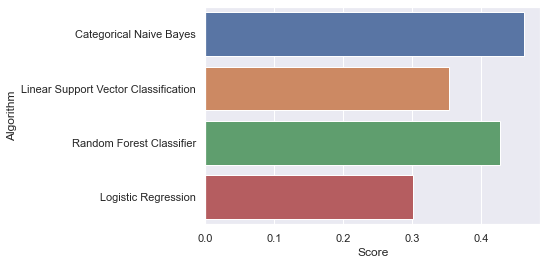

In [60]:
sea.barplot(y='Algorithm', x='Score', data=df_scores)
plt.savefig('images/scores_bar.png')

As you can see from the above chart, Categorical Naive Bayes was able to achieve the best results. This was what I expected after
trying to work with the data to help the Logistic Regression algorithm converge.

Overall this has been a really fun and interesting project to work on. It was fun getting to read and experiment with different algorithms
along the way.
